# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Import Data

In [26]:
df_ori = pd.read_csv('Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Data Preprocessing

## Dataset Overview

In [27]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data Integrity Checks

In [28]:
# check for duplicates
df_ori.duplicated().sum()

0

In [29]:
# check for missing values
pd.DataFrame({
    'Missing Count': df_ori.isna().sum(),
    'Missing %': (df_ori.isna().sum() / df_ori.shape[0] * 100).round(2)
})

,Missing Count,Missing %
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


# Data Preprocessing

In [36]:
# nominal and datetime columns to drop
cols_to_drop = [
    'StandardHours', 
    'EmployeeCount', 
    'Over18',
    'EmployeeNumber'
]

df = df_ori.drop(columns=cols_to_drop)

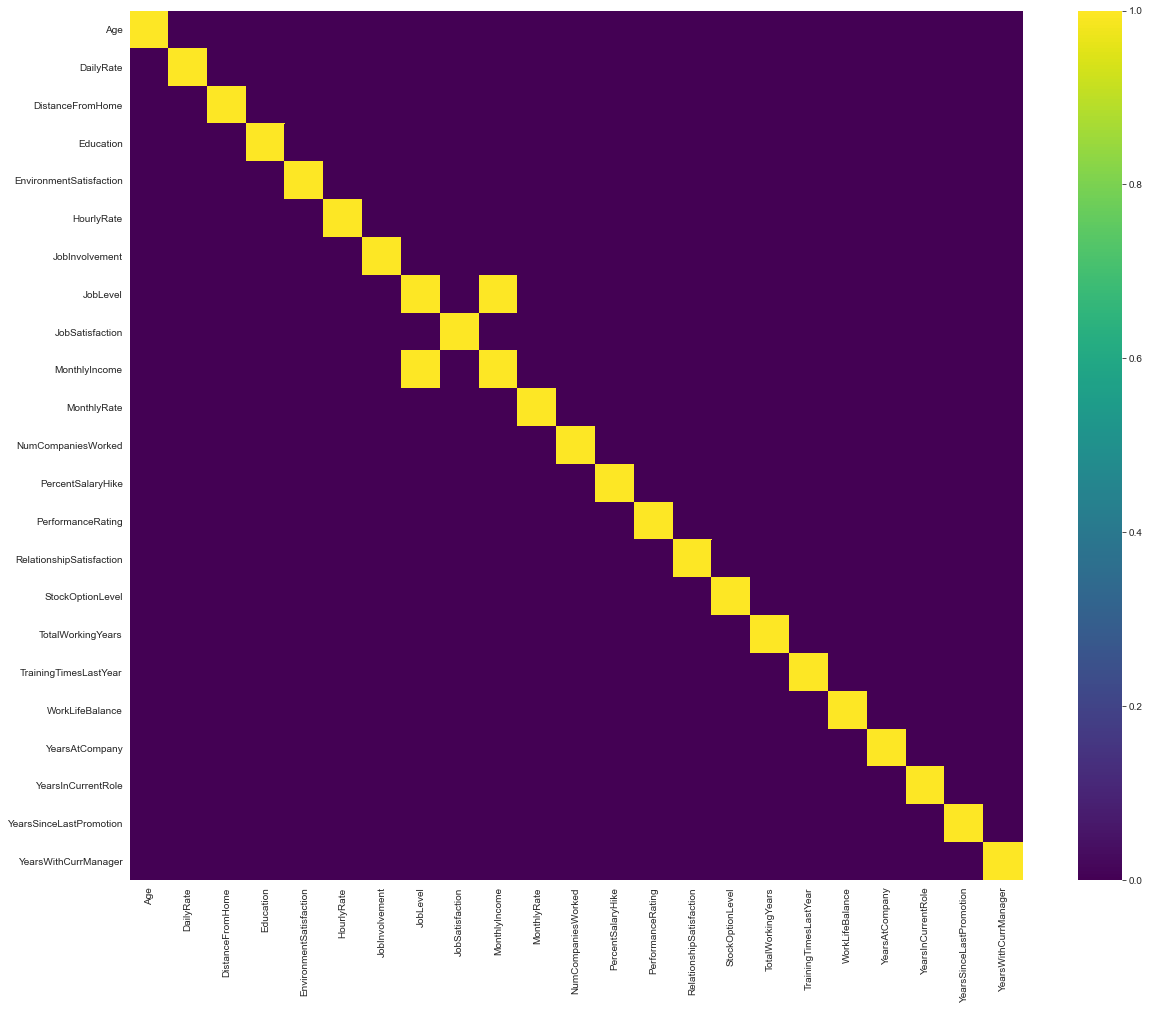

In [37]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(abs(corr_matrix) > 0.8, cmap='viridis');

In [38]:
# drop columns with high correlation with the other column
df.drop(columns=['JobLevel'], inplace=True)

In [39]:
df.columns.to_list()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [40]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.728571,6502.931293,14313.103401,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.102846,4707.956783,7117.786044,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,2094.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,8047.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,14235.500000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,20461.500000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,26999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [50]:
cols_category = [
    'Attrition',
    'BusinessTravel',
    'Department', 
    'EducationField', 
    'Gender', 
    'JobRole', 
    'MaritalStatus', 
    'OverTime'
]

Attrition  BusinessTravel   
No         Travel_Rarely        887
           Travel_Frequently    208
Yes        Travel_Rarely        156
No         Non-Travel           138
Yes        Travel_Frequently     69
           Non-Travel            12
dtype: int64

In [61]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [60]:
# create a list of our conditions
conditions = [
    (df.Attrition == 'No'),
    (df.Attrition == 'Yes')
]

# create a list of the values we want to assign for each condition
values = [0, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df.Attrition = np.select(conditions, values)

In [53]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [62]:
# create a list of our conditions
conditions = [
    (df.BusinessTravel == 'Non-Travel'),
    (df.BusinessTravel == 'Travel_Rarely'),
    (df.BusinessTravel == 'Travel_Frequently')
]

# create a list of the values we want to assign for each condition
values = [0, 1, 2]

# create a new column and use np.select to assign values to it using our lists as arguments
df.Attrition = np.select(conditions, values)

In [63]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [64]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [65]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [66]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [67]:
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [68]:
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [69]:
# create a list of our conditions
conditions = [
    (df.OverTime == 'No'),
    (df.OverTime == 'Yes')
]

# create a list of the values we want to assign for each condition
values = [0, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df.Attrition = np.select(conditions, values)

# Train Test Split